In [32]:
import gym
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from collections import defaultdict

% matplotlib inline
matplotlib.style.use('ggplot')

In [27]:
def plot_value_function(V, title):
    """
    Plots the value function as a surface plot.
    """
    min_x = min(k[0] for k in V.keys())
    max_x = max(k[0] for k in V.keys())
    min_y = min(k[1] for k in V.keys())
    max_y = max(k[1] for k in V.keys())

    x_range = np.arange(min_x, max_x + 1)
    y_range = np.arange(min_y, max_y + 1)
    X, Y = np.meshgrid(x_range, y_range)

    Z_noace = np.apply_along_axis(lambda _: V[(_[0], _[1], False)], 2, np.dstack([X, Y]))
    Z_ace = np.apply_along_axis(lambda _: V[(_[0], _[1], True)], 2, np.dstack([X, Y]))
    
    def plot_surface(X, Y, Z, title=None):
        fig = plt.figure(figsize=(20, 10), facecolor='white')

        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                               cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player sum')
        ax.set_ylabel('Dealer showing')
        ax.set_zlabel('Value')
        if title: ax.set_title(title)
        ax.view_init(ax.elev, -120)
        ax.set_facecolor("white")
        fig.colorbar(surf)
        plt.show()

    plot_surface(X, Y, Z_noace, "(No Usable Ace)")
    plot_surface(X, Y, Z_ace, "(Usable Ace)")

In [26]:
env = gym.make("Blackjack-v0")

def epsilon_greddy_policy(q, epsilon, nA):
    
    def policy_(state):
        A_ = np.ones(nA, dtype=float)
        A = A_ * epsilon / nA
        best = np.argmax(q[state])
        A[best] += 1 - epsilon
        return A
    
    return policy_

def mc_firstvisit_control_epsilon_greddy(env, num_episodes=100, epsilon=0.1, 
                                         episode_endtime = 10, discount=1.0):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    r_sum = defaultdict(float)
    r_cou = defaultdict(float)
    
    policy = epsilon_greddy_policy(Q, epsilon, nA)
    
    for i in range(num_episodes):
        # print out the episodes rate for displaying.
        episode_rate = int(40 * i / num_episodes)
        print("Episode {}/{}".format(i+1, num_episodes), end="\r")
        sys.stdout.flush()
        
        # init the episode list and state
        episode = []
        state = env.reset()

        # Generate an episode which including tuple(state, aciton, reward).
        for j in range(episode_endtime):
            # explore and explict the state-action by epsilon greddy algorithm. 
            action_prob = policy(state)
            action = np.random.choice(np.arange(action_prob.shape[0]), p=action_prob)
            
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done: break
            state = next_state
        
        for k, (state, actions, reward) in enumerate(episode):
            # state action pair in tuple type
            sa_pair = (state, action)
            first_visit_idx = k
            G = sum([x[2] * np.power(discount, i) for i, x in enumerate(episode[first_visit_idx:])])
            
            r_sum[sa_pair] += G
            r_cou[sa_pair] += 1.0
            Q[state][actions] = r_sum[sa_pair] / r_cou[sa_pair]
            
    return Q
    
Q = mc_firstvisit_control_epsilon_greddy(env, num_episodes=500000)

V = defaultdict(float)
for state, actions in Q.items():
    V[state] = np.max(actions)

plot_value_function(v1, title=None)

NameError: name 'plot_value_function' is not defined

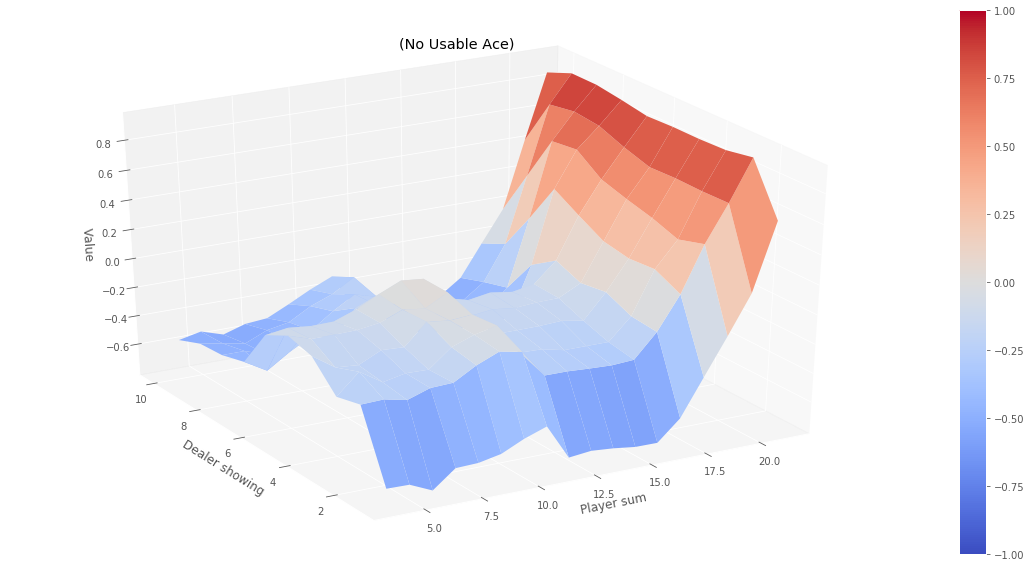

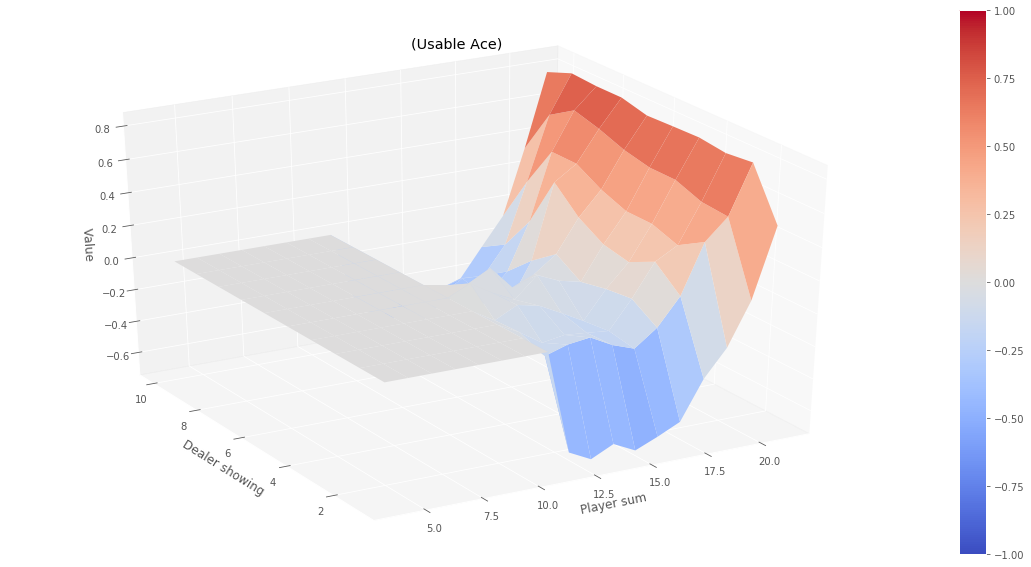

In [33]:
plot_value_function(V, title=None)